In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the data
data = pd.read_csv("formula1_interlagos_df_final.csv")

# Select relevant features and target
features = ['MaxSpeed', 'Age', 'PitStopTime', 'TyreWear', 'WeatherCondition_Mixed', 'WeatherCondition_Wet', 'TrackGrip_Low']
target = 'FinalRaceTime'

circuit_data = data[data['Circuit'] == "Melbourne"].copy()

X = circuit_data[features]
y = circuit_data[target]

    # Handle missing values
X = X.dropna()
y = y[X.index]



    # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    # Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_
intercept = model.intercept_

#print("\nEquation of the hyperplane:")
equation = f"FinalRaceTime = {intercept:.2f}"
for feature, coef in zip(features, coefficients):
    equation += f" + ({coef:.2f} * {feature})"
print(equation)

# Calculate R-squared
r_squared = model.score(X_test_scaled, y_test)




print(f"{r_squared:.4f}")



FinalRaceTime = 267.70 + (-3.70 * MaxSpeed) + (-2.58 * Age) + (-1.91 * PitStopTime) + (-5.59 * TyreWear) + (3.61 * WeatherCondition_Mixed) + (6.59 * WeatherCondition_Wet) + (5.53 * TrackGrip_Low)
0.2510


## Linealidad

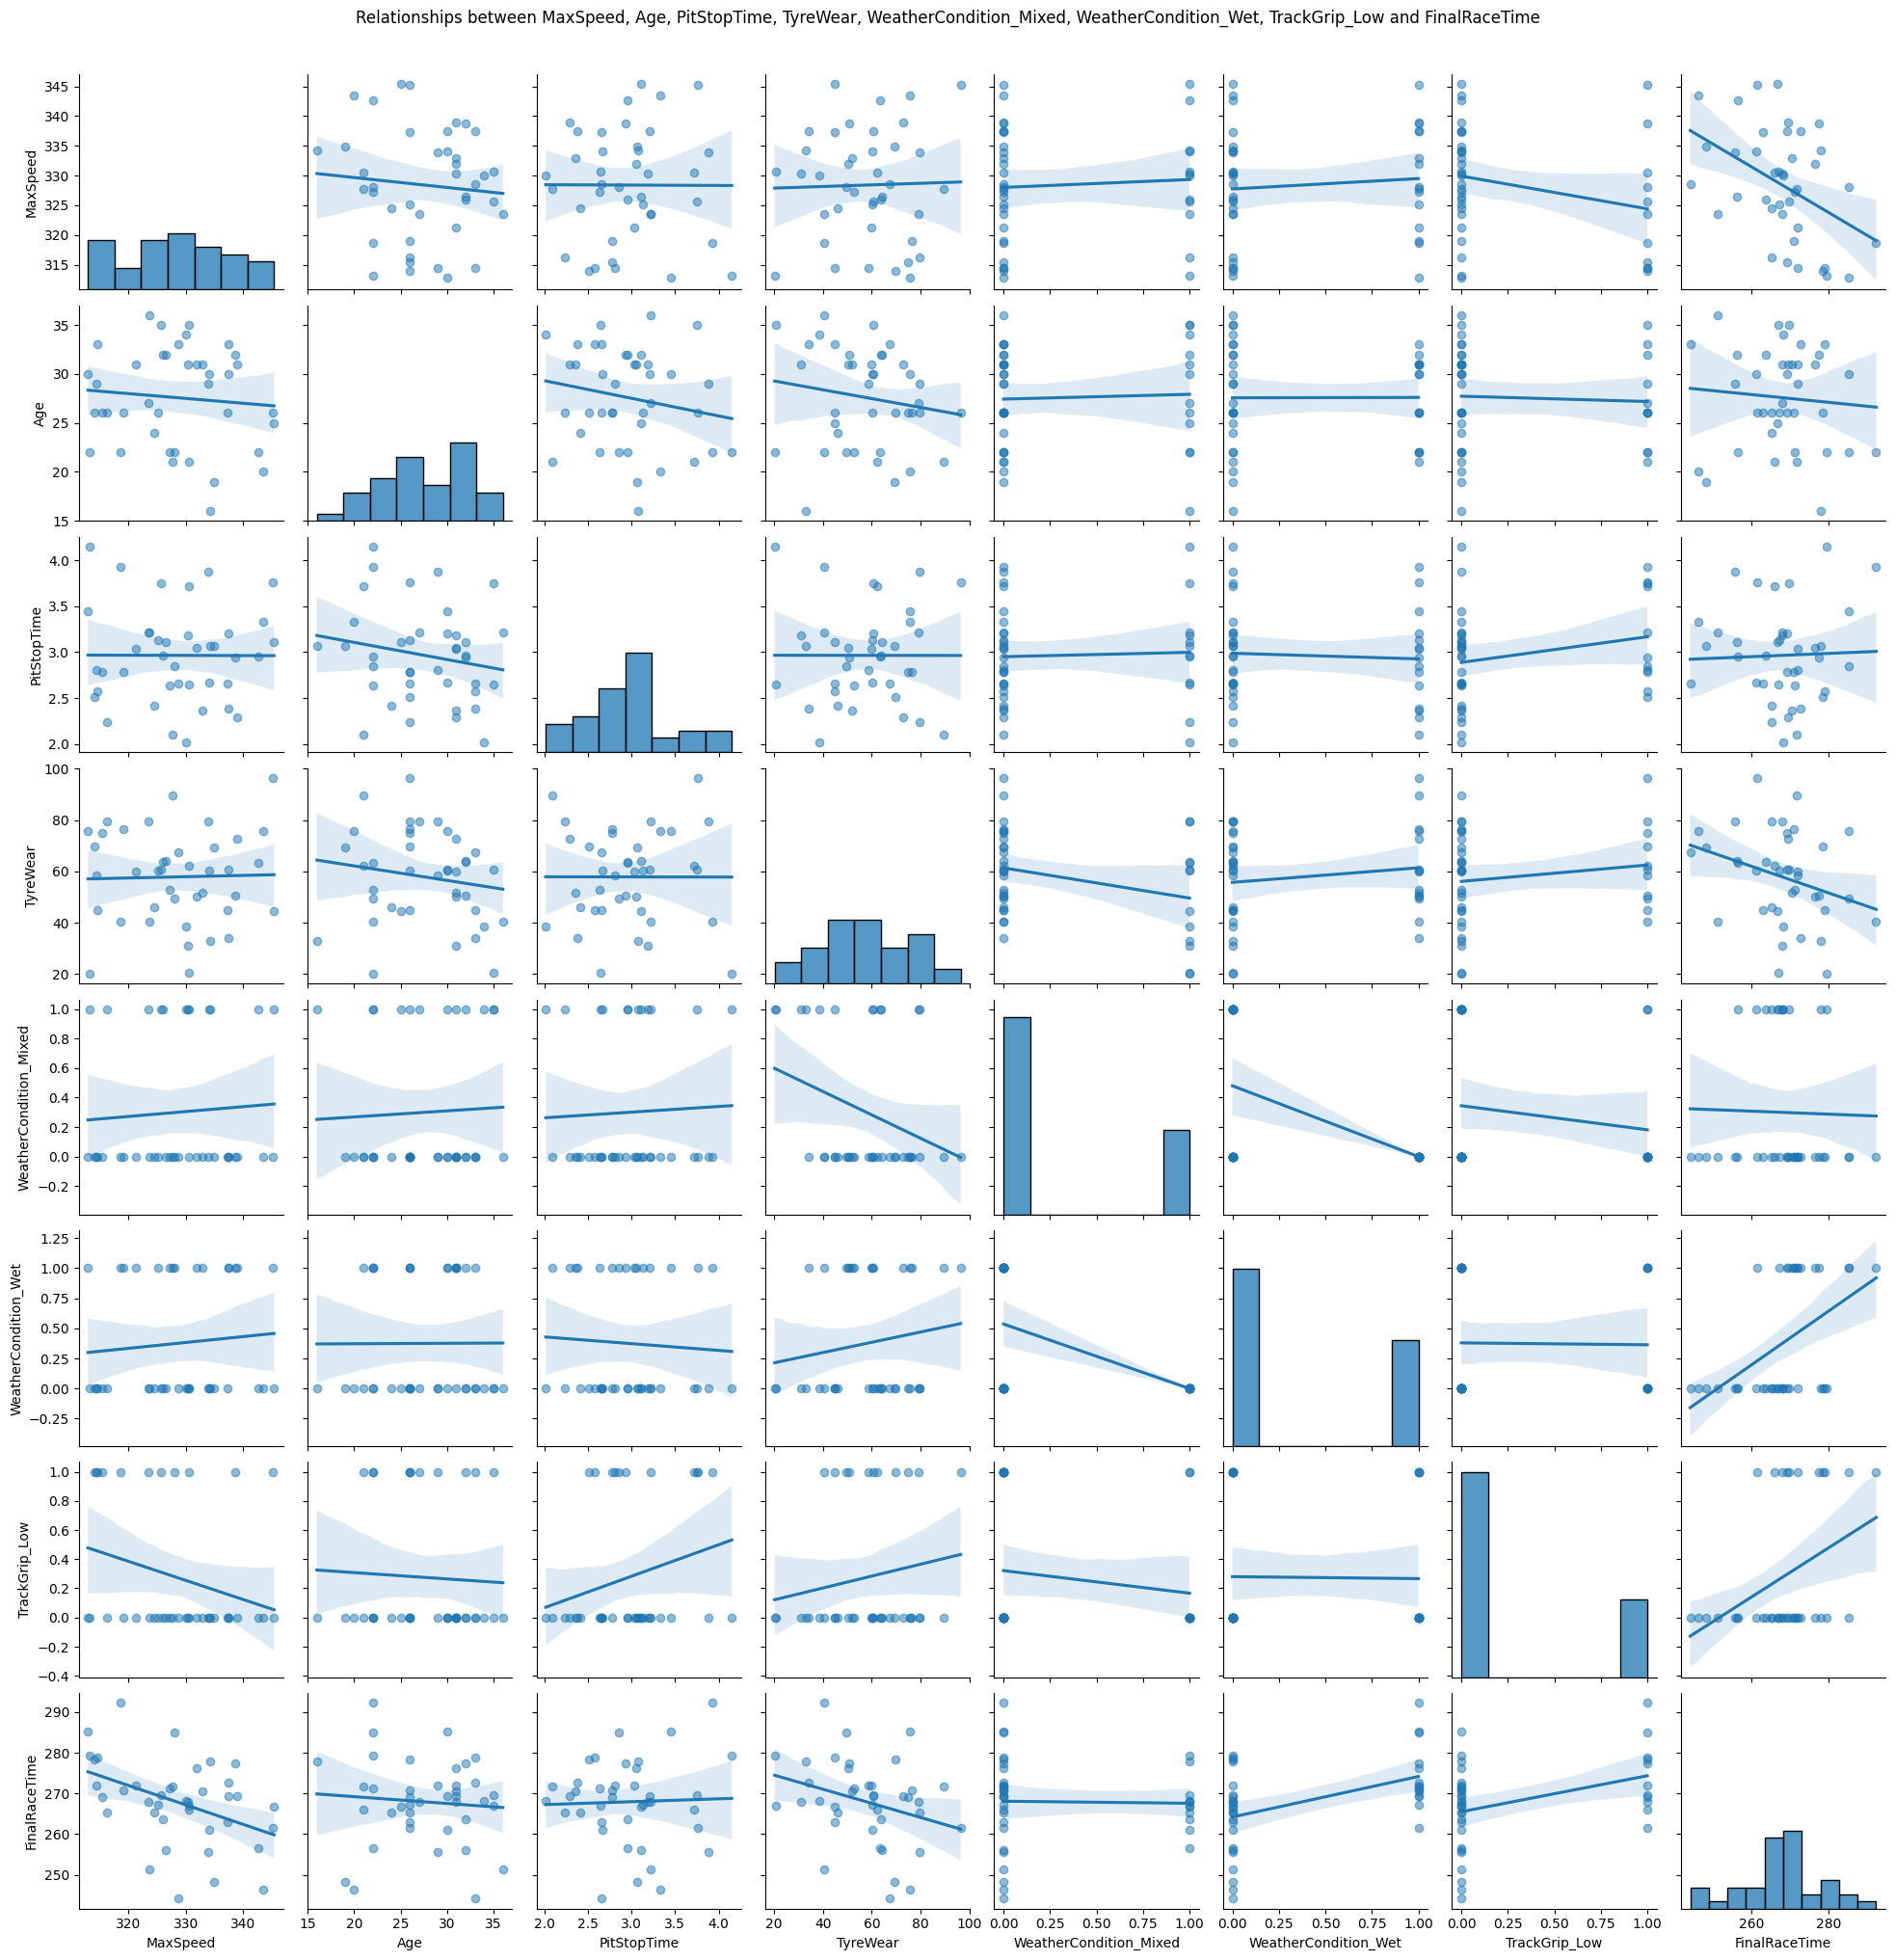

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Crear el gráfico de pares (pairplot)
sns.pairplot(circuit_data[features + [target]], kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.suptitle(f'Relationships between {", ".join(features)} and {target}', y=1.02)
plt.show()



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import io
from urllib.request import urlopen


# Agregar constante para la intersección
X_train_const = sm.add_constant(X_train_scaled)

# Ajustar el modelo de regresión con statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()

# Mostrar los p-values de cada coeficiente
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          FinalRaceTime   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     29.22
Date:                Thu, 06 Mar 2025   Prob (F-statistic):           2.93e-10
Time:                        06:51:09   Log-Likelihood:                -83.683
No. Observations:                  32   AIC:                             183.4
Df Residuals:                      24   BIC:                             195.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.6977      0.675    396.522      0.0

## Normalidad de los Residuos

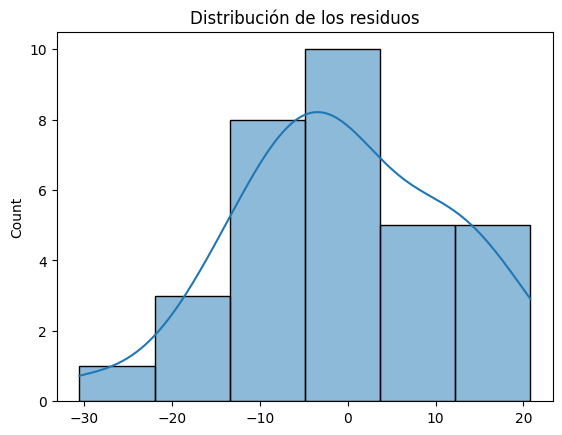

In [10]:

import statsmodels.api as sm
X = circuit_data[features]
y = circuit_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


model = sm.OLS(y, X).fit()

residuals = y_train - model.predict(X)
sns.histplot(residuals, kde=True)
plt.title('Distribución de los residuos')
plt.show()

Kolmogorov-Smirnov Test: p-value = 0.6085
Anderson-Darling Test: statistic = 0.4021
Critical values: [0.523 0.596 0.715 0.834 0.992]
Significance levels: [15.  10.   5.   2.5  1. ]
Jarque-Bera Test: p-value = 0.7950


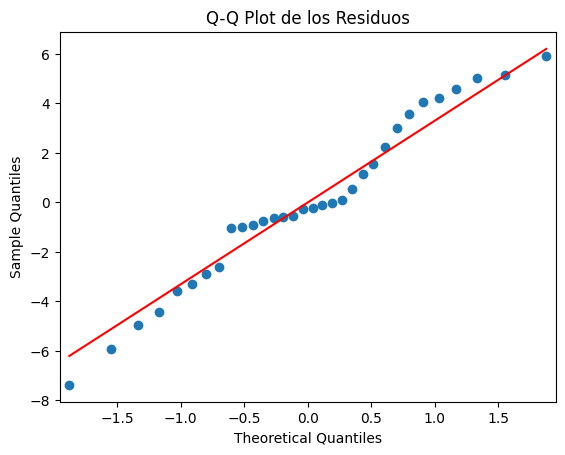

In [11]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que 'residuals' es un array con los residuos del modelo
residuals = model_sm.resid  # Extrae los residuos del modelo Statsmodels

# 1. Prueba de Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f"Kolmogorov-Smirnov Test: p-value = {ks_p_value:.4f}")

# 2. Prueba de Anderson-Darling
anderson_result = stats.anderson(residuals, dist='norm')
print(f"Anderson-Darling Test: statistic = {anderson_result.statistic:.4f}")
print("Critical values:", anderson_result.critical_values)
print("Significance levels:", anderson_result.significance_level)

# 3. Prueba de Jarque-Bera
jb_stat, jb_p_value = stats.jarque_bera(residuals)
print(f"Jarque-Bera Test: p-value = {jb_p_value:.4f}")

# 4. Gráfico Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot de los Residuos")
plt.show()


## Homocedasticidad

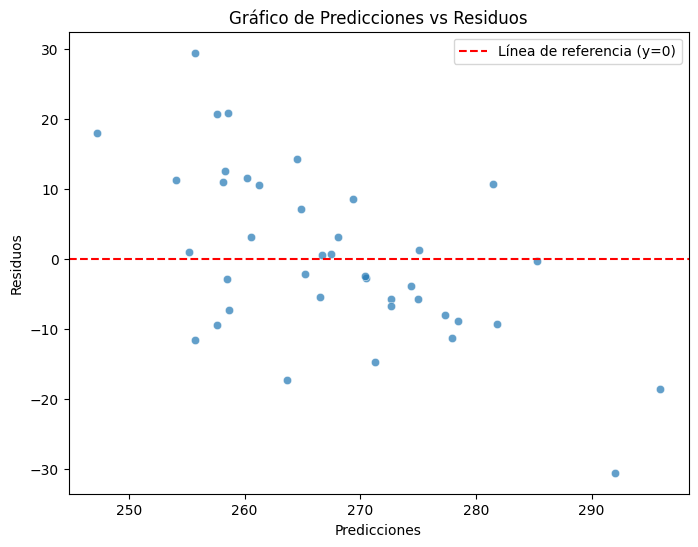


Breusch-Pagan Test Results:
LM Statistic: 9.3948
LM-Test p-value: 0.2255
F-Statistic: 1.4033
F-Test p-value: 0.2382

✅ No hay evidencia de heterocedasticidad. Se cumple el supuesto de homocedasticidad.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.api import het_breuschpagan

# Calcular predicciones del modelo
y_pred = model.predict(X)

# Calcular los residuos
residuals = model.resid

# 📊 1. Gráfico de Predicciones vs Residuos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', label="Línea de referencia (y=0)")
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Predicciones vs Residuos')
plt.legend()
plt.show()

# 📊 2. Test de Breusch-Pagan
# Agregar una constante a las variables independientes (X)
X_const = sm.add_constant(X)

# Realizar el test de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X_const)

# Resultados
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
results = dict(zip(labels, bp_test))

print("\nBreusch-Pagan Test Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

# Interpretación del p-value
if results['LM-Test p-value'] > 0.05:
    print("\n✅ No hay evidencia de heterocedasticidad. Se cumple el supuesto de homocedasticidad.")
else:
    print("\n❌ Hay heterocedasticidad en el modelo. Puede ser necesario aplicar correcciones.")

## No Multiconealidad

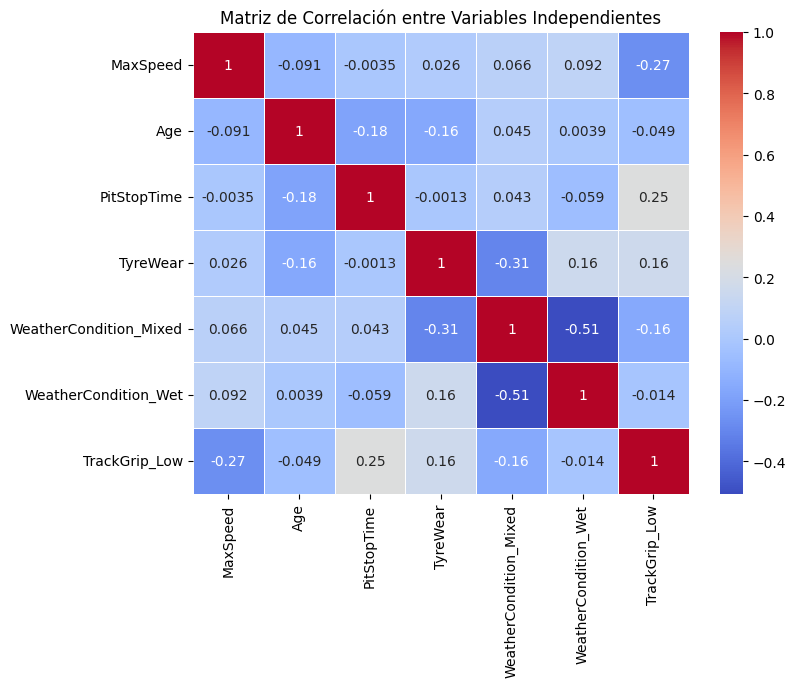


📊 Variance Inflation Factor (VIF) para cada variable independiente:
                 Variable        VIF
0                MaxSpeed  98.651831
1                     Age  31.366245
2             PitStopTime  38.507023
3                TyreWear  13.456484
4  WeatherCondition_Mixed   2.145247
5    WeatherCondition_Wet   2.200370
6           TrackGrip_Low   1.588321

❌ Hay variables con alta multicolinealidad (VIF > 10). Considera eliminarlas o combinarlas.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 📌 1. Matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Independientes')
plt.show()

# 📌 2. Calcular el Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print("\n📊 Variance Inflation Factor (VIF) para cada variable independiente:")
print(vif_data)

# Interpretación del VIF
high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print("\n❌ Hay variables con alta multicolinealidad (VIF > 10). Considera eliminarlas o combinarlas.")
else:
    print("\n✅ No hay evidencia de alta multicolinealidad. El modelo es estable.")




FinalRaceTime = 267.70 + (-1.68 * Age) + (-5.57 * TyreWear) + (3.03 * WeatherCondition_Mixed) + (5.79 * WeatherCondition_Wet) + (5.91 * TrackGrip_Low)
0.1572


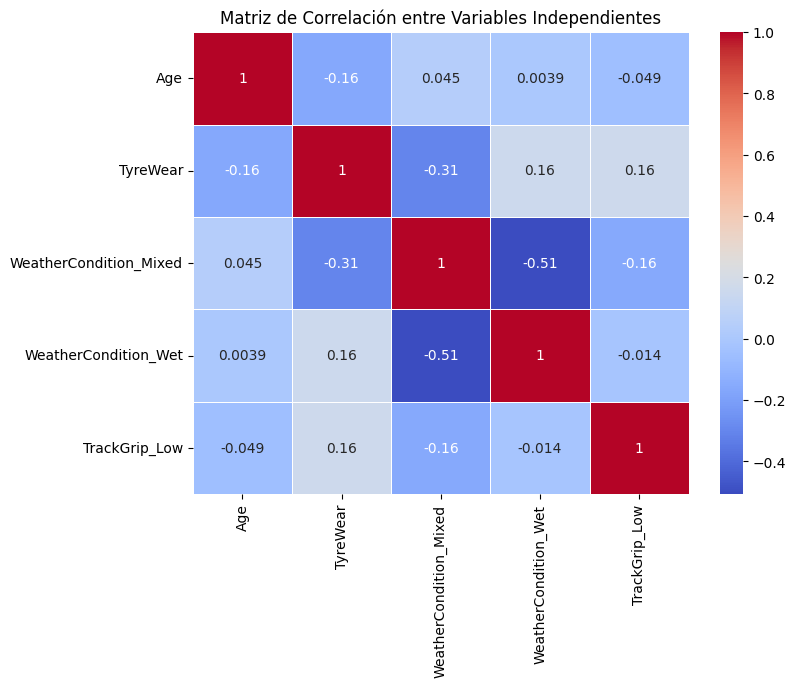


📊 Variance Inflation Factor (VIF) para cada variable independiente:
                 Variable       VIF
0                     Age  9.969915
1                TyreWear  8.497890
2  WeatherCondition_Mixed  1.942791
3    WeatherCondition_Wet  2.130211
4           TrackGrip_Low  1.445997

✅ No hay evidencia de alta multicolinealidad. El modelo es estable.


In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the data
data = pd.read_csv("formula1_interlagos_df_final.csv")

# Select relevant features and target
features = [ 'Age', 'TyreWear', 'WeatherCondition_Mixed', 'WeatherCondition_Wet', 'TrackGrip_Low']
target = 'FinalRaceTime'


circuit_data = data[data['Circuit'] == "Melbourne"].copy()

X = circuit_data[features]
y = circuit_data[target]

    # Handle missing values
X = X.dropna()
y = y[X.index]



    # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    # Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_
intercept = model.intercept_

#print("\nEquation of the hyperplane:")
equation = f"FinalRaceTime = {intercept:.2f}"
for feature, coef in zip(features, coefficients):
    equation += f" + ({coef:.2f} * {feature})"
print(equation)

# Calculate R-squared
r_squared = model.score(X_test_scaled, y_test)




print(f"{r_squared:.4f}")



# 📌 1. Matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Independientes')
plt.show()

# 📌 2. Calcular el Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print("\n📊 Variance Inflation Factor (VIF) para cada variable independiente:")
print(vif_data)

# Interpretación del VIF
high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print("\n❌ Hay variables con alta multicolinealidad (VIF > 10). Considera eliminarlas o combinarlas.")
else:
    print("\n✅ No hay evidencia de alta multicolinealidad. El modelo es estable.")


